In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoLarsCV, RidgeCV, SGDRegressor, LinearRegression()

In [2]:
df= pd.read_excel(r"C:\Users\yedla\Downloads\Stacking_max_stress\vznd6z234n-1\Data.xlsx")
df.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length,max_stress
0,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,250,1726.66
1,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,200,1727.58
2,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,150,1731.44
3,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,100,1734.23
4,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,32,250,1975.26


In [3]:
df.shape

(8766, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   L1             8766 non-null   int64  
 1   L2             8766 non-null   int64  
 2   L3             8766 non-null   int64  
 3   L4             8766 non-null   int64  
 4   L5             8766 non-null   int64  
 5   L6             8766 non-null   int64  
 6   force          8766 non-null   int64  
 7   depth          8766 non-null   float64
 8   hole_radius    8766 non-null   float64
 9   circle_radius  8766 non-null   float64
 10  hole_angle     8766 non-null   int64  
 11  width          8766 non-null   int64  
 12  length         8766 non-null   int64  
 13  max_stress     8766 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 958.9 KB


No null values in any feature

In [5]:
df.describe()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length,max_stress
count,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000
mean,9.199179,55.441478,9.199179,-18.644764,64.887064,9.199179,25112.936345,2.723889,2.250171,3.375257,45.581793,29.998631,174.988592,2252.545386
std,18.148711,32.818958,18.148711,22.168519,34.866608,18.148711,11309.261449,0.909047,0.750043,1.125064,30.098588,4.471983,55.904887,1431.930881
min,0.000000,0.000000,0.000000,-45.000000,0.000000,0.000000,10000.000000,1.818000,1.500000,2.250000,0.000000,24.000000,100.000000,308.511000
25%,0.000000,45.000000,0.000000,-45.000000,45.000000,0.000000,20000.000000,1.818000,1.500000,2.250000,15.000000,25.000000,112.500000,1140.650000
50%,0.000000,45.000000,0.000000,0.000000,90.000000,0.000000,30000.000000,1.818000,3.000000,4.500000,45.000000,28.000000,150.000000,1918.925000
75%,0.000000,90.000000,0.000000,0.000000,90.000000,0.000000,40000.000000,3.636000,3.000000,4.500000,75.000000,32.000000,200.000000,3024.272500
max,45.000000,90.000000,45.000000,0.000000,90.000000,45.000000,50000.000000,3.636000,3.000000,4.500000,90.000000,36.000000,250.000000,9087.900000


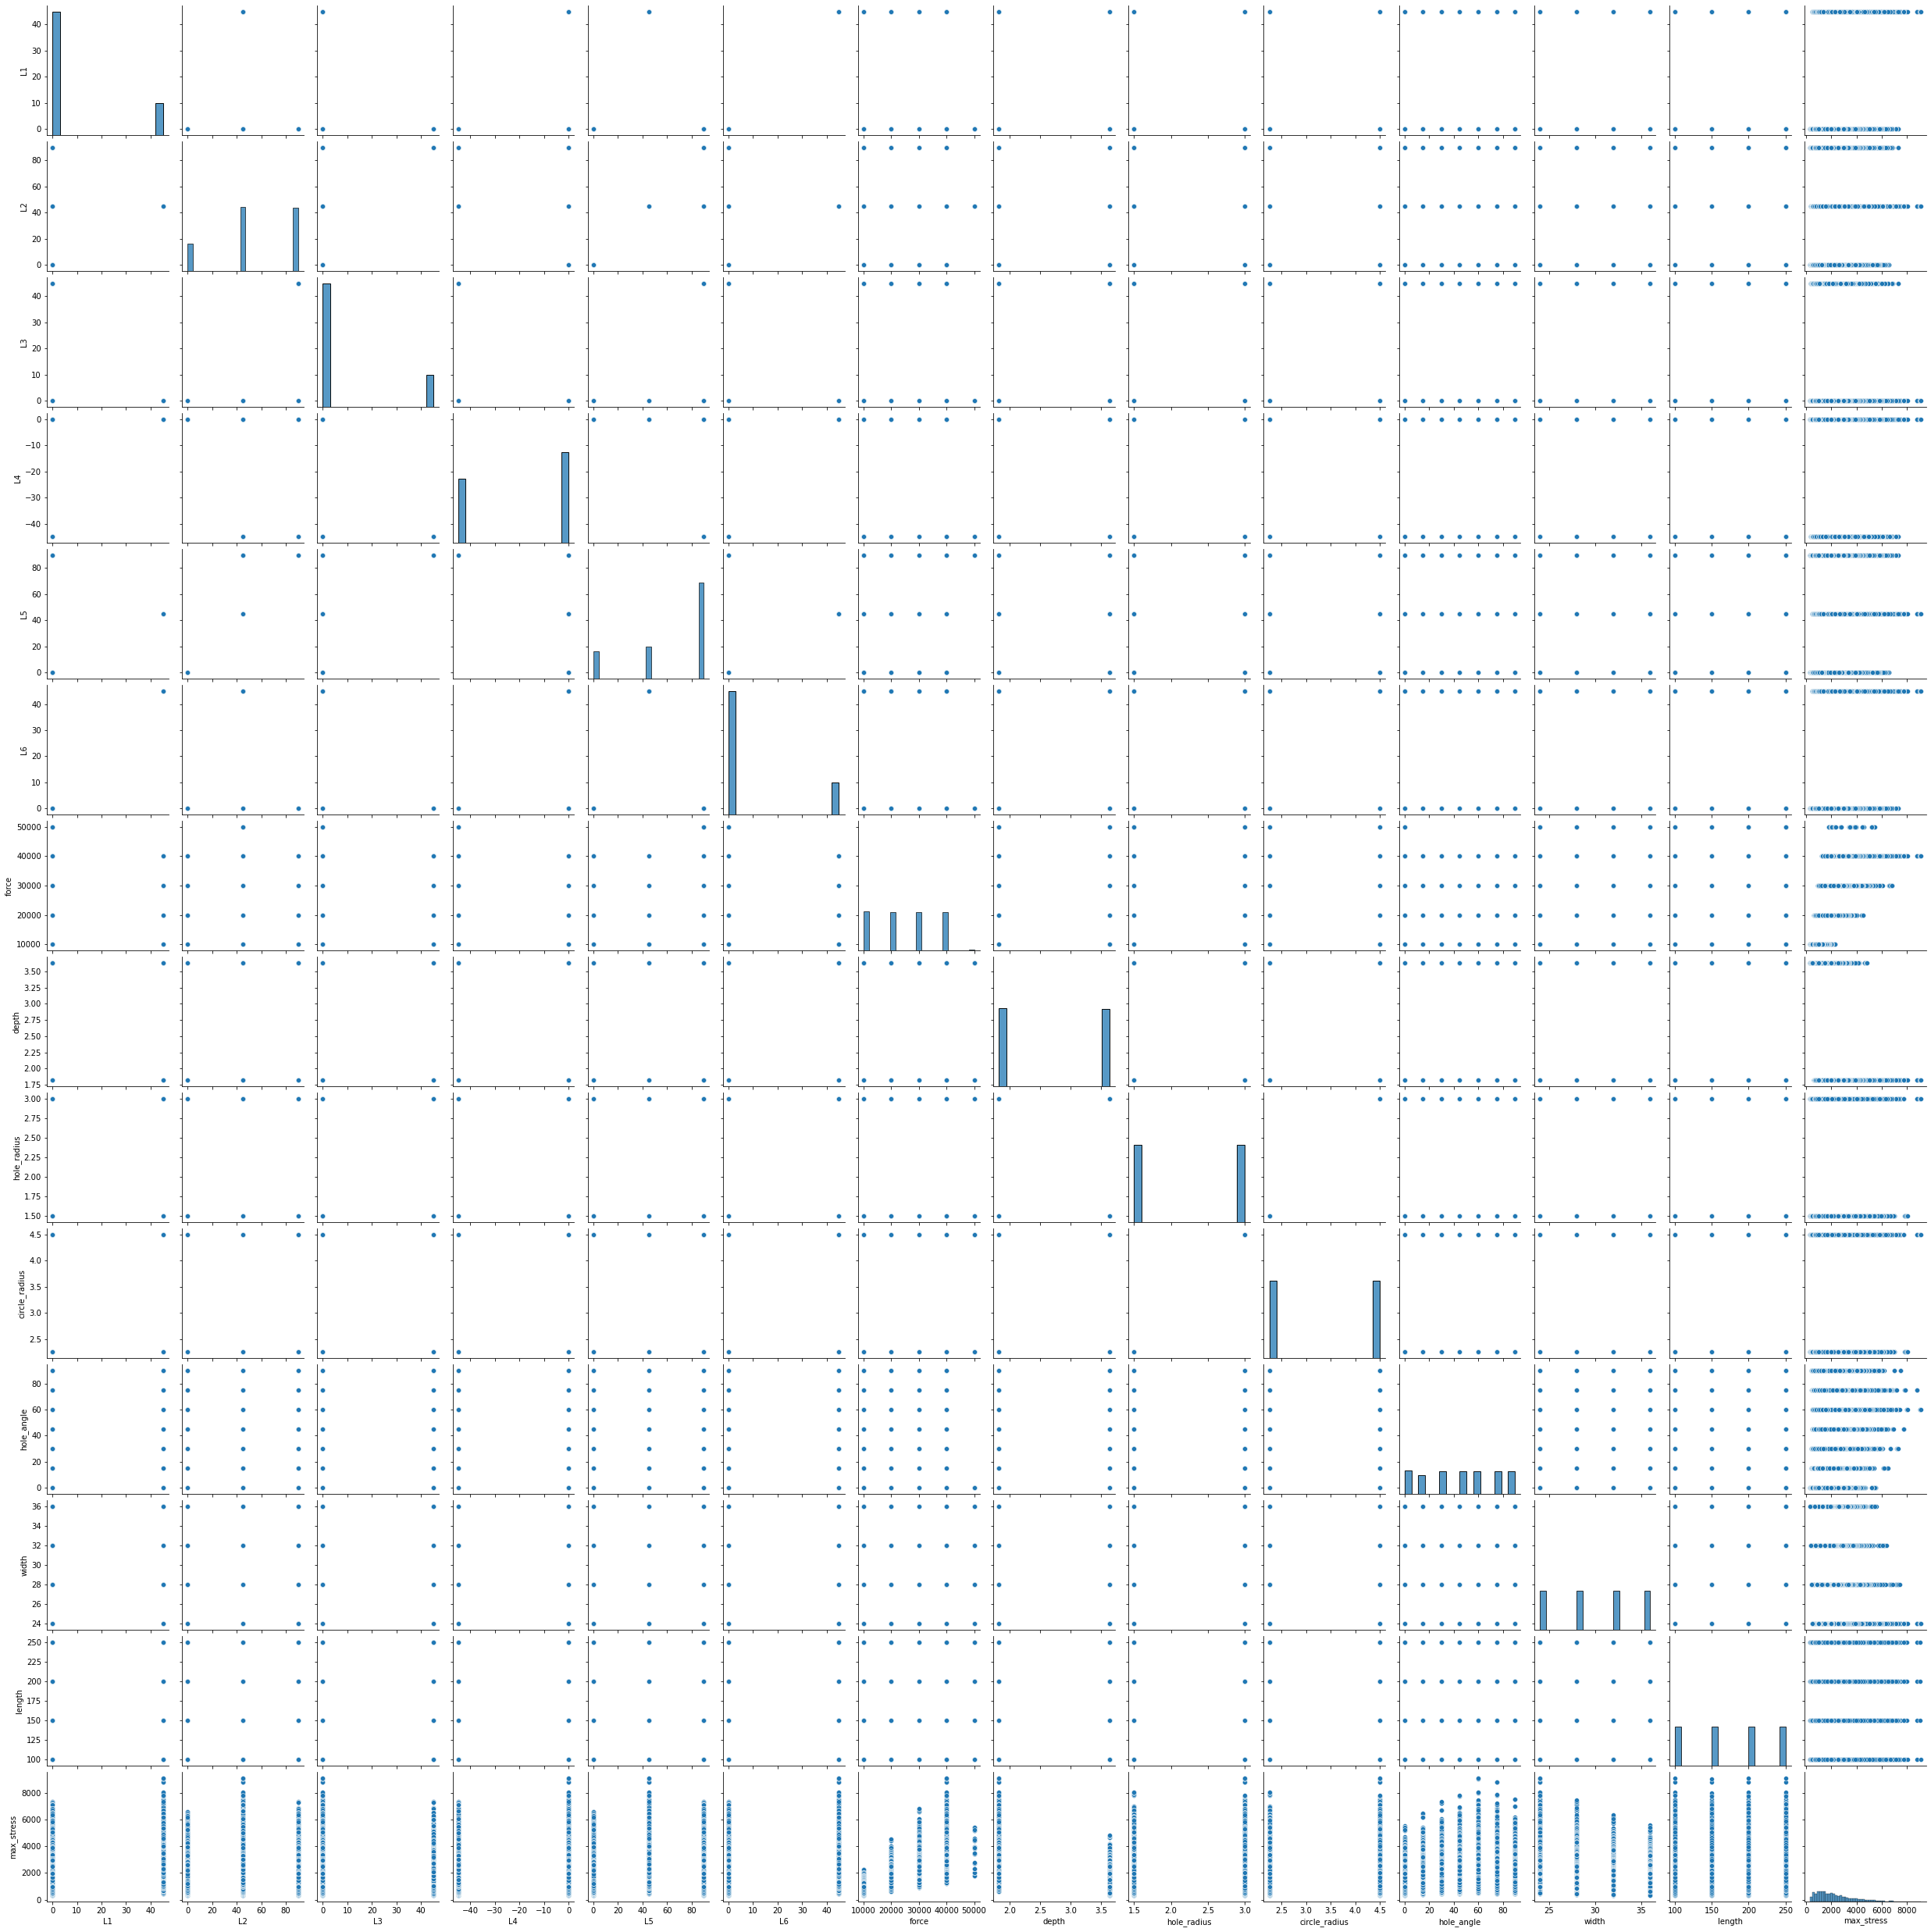

In [6]:
sns.pairplot(data=df)

Text(0, 0.5, 'Stress')

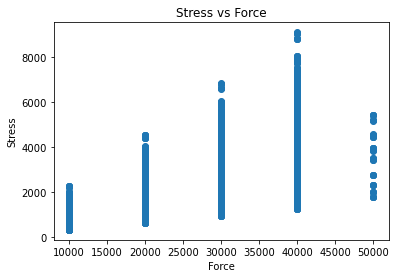

In [7]:
plt.scatter(x=df['force'],y=df['max_stress'])
plt.title("Stress vs Force")
plt.xlabel("Force")
plt.ylabel("Stress")

Though we are applying standard forces, the stress is varying because of varying radius and cross section dimensions

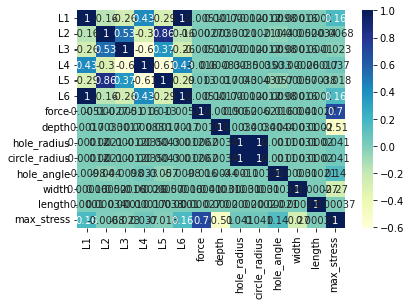

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
y=df.iloc[:,-1:]
y.head()

,max_stress
0,1726.66
1,1727.58
2,1731.44
3,1734.23
4,1975.26


In [10]:
X=df.iloc[:,:-1]
X.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length
0,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,250
1,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,200
2,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,150
3,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,36,100
4,0,90,45,-45,90,0,40000,3.636,3.0,4.5,15,32,250


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=19)

In [12]:
print(len(X_train),len(X_test))

6136 2630


In [13]:
X_train.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length
642,0,90,45,-45,90,0,20000,3.636,3.0,4.50,75,36,150
6526,0,45,0,-45,90,0,30000,3.636,3.0,4.50,45,36,250
5353,0,45,0,-45,90,0,10000,3.636,1.5,2.25,30,28,100
2169,45,45,0,0,45,45,30000,1.818,1.5,2.25,75,28,200
663,0,90,45,-45,90,0,20000,3.636,1.5,2.25,75,32,100


In [14]:
#Normalising the data using MINMAX Scaler()

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

#test data
X_test_scaled= scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [16]:
X_train_scaled.head()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length
0,0.0,1.0,1.0,0.0,1.0,0.0,0.25,1.0,1.0,1.0,0.833333,1.000000,0.333333
1,0.0,0.5,0.0,0.0,1.0,0.0,0.50,1.0,1.0,1.0,0.500000,1.000000,1.000000
2,0.0,0.5,0.0,0.0,1.0,0.0,0.00,1.0,0.0,0.0,0.333333,0.333333,0.000000
3,1.0,0.5,0.0,1.0,0.5,1.0,0.50,0.0,0.0,0.0,0.833333,0.333333,0.666667
4,0.0,1.0,1.0,0.0,1.0,0.0,0.25,1.0,0.0,0.0,0.833333,0.666667,0.000000


In [17]:
X_test_scaled.tail()

,L1,L2,L3,L4,L5,L6,force,depth,hole_radius,circle_radius,hole_angle,width,length
2625,0.0,1.0,1.0,0.0,1.0,0.0,0.25,0.0,1.0,1.0,0.166667,0.000000,0.000000
2626,0.0,0.5,0.0,0.0,1.0,0.0,0.00,0.0,1.0,1.0,0.166667,1.000000,1.000000
2627,1.0,0.5,0.0,1.0,0.5,1.0,0.50,0.0,0.0,0.0,0.666667,0.333333,0.666667
2628,0.0,1.0,0.0,1.0,1.0,0.0,0.00,0.0,1.0,1.0,0.166667,0.666667,1.000000
2629,0.0,1.0,0.0,1.0,1.0,0.0,0.50,0.0,0.0,0.0,0.333333,0.666667,0.666667


C:\Users\yedla\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yedla\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


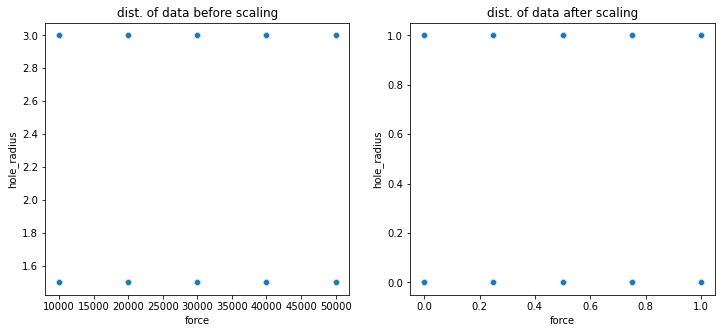

In [21]:

fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

sns.scatterplot(X_train['force'],X_train['hole_radius'],ax=ax1)
ax1.set_title('dist. of data before scaling')

sns.scatterplot(X_train_scaled['force'],X_train_scaled['hole_radius'],ax=ax2)
ax2.set_title('dist. of data after scaling')

plt.show()

### Modelling

In [25]:
dtr=DecisionTreeRegressor( max_depth = 7, min_samples_leaf = 4, min_samples_split = 14)
#rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors = 32, p=1, weights = "uniform")
gbr=GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6, max_features = 0.15,alpha = 0.8, min_samples_leaf = 13, min_samples_split = 5)
sgr=SGDRegressor(l1_ratio = 0.25, penalty = "elasticnet", loss = "epsilon_insensitive", power_t = 1.0)
poly=PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [28]:
cv=KFold(n_splits=10)

In [29]:
clf = [gbr,poly,sgr,dtr,knr]
for algo in clf:
    score = cross_val_score( algo,X_train_scaled,y_train,cv = cv,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

C:\Users\yedla\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn

C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

The accuracy score of GradientBoostingRegressor(alpha=0.8, max_depth=6, max_features=0.15,
                          min_samples_leaf=13, min_samples_split=5) is: nan
The accuracy score of PolynomialFeatures(include_bias=False) is: nan


C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

The accuracy score of SGDRegressor(l1_ratio=0.25, loss='epsilon_insensitive', penalty='elasticnet',
             power_t=1.0) is: nan


C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

The accuracy score of DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=14) is: nan


C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

The accuracy score of KNeighborsRegressor(n_neighbors=32, p=1) is: nan


C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

In [30]:
X_train_trans = poly.fit_transform(X_train_scaled)
X_test_trans = poly.transform(X_test_scaled)

In [34]:
cls = [('gbr',gbr),('sgr',sgr),('dtr',dtr),('knr',knr)]


In [31]:
from sklearn.ensemble import StackingRegressor

In [32]:
lr=LassoLarsCV()

In [35]:
stack= StackingRegressor(estimators=cls,final_estimator=lr)

In [36]:
score = cross_val_score(stack,X_train_scaled,y_train,cv = 10,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

C:\Users\yedla\anaconda\lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\s

C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

The accuracy score of is: nan


C:\Users\yedla\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\yedla\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise ValueError("{0} i

In [38]:
stack.fit(X_train_scaled,y_train)

C:\Users\yedla\anaconda\lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(alpha=0.8, max_depth=6,
                                                         max_features=0.15,
                                                         min_samples_leaf=13,
                                                         min_samples_split=5)),
                              ('sgr',
                               SGDRegressor(l1_ratio=0.25,
                                            loss='epsilon_insensitive',
                                            penalty='elasticnet',
                                            power_t=1.0)),
                              ('dtr',
                               DecisionTreeRegressor(max_depth=7,
                                                     min_samples_leaf=4,
                                                     min_samples_split=14)),
                              ('knr',
                               KNeighborsRegressor(n_neighbors=32, p=1))],
                  final_estimator=LassoLarsCV())

In [39]:
predictions=stack.predict(X_test_scaled)


In [40]:
predictions

array([1401.71609905, 1930.85591553, 1570.87348597, ..., 4902.84524841,
       1020.98619816, 3131.53409554])

In [41]:
stack.score(X_test_scaled,y_test) #r2_score of testing

0.9892605917277149

In [43]:
stack.score(X_train_scaled,y_train) #r2_score of training

0.9907593775077781